In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.getcwd()

'c:\\Programming\\Github\\Project\\ChemGCNs\\visualization'

In [40]:
df = pd.read_csv(r'..\results_datasets\cherry.csv')
df

logvp = pd.read_csv(r'..\datasets\VP.csv')
logvp

,smiles,logvp
0,COC(F)(F)C(F)(F)C(F)(F)F,2.750000
1,COC(F)(F)C(F)(F)F,3.210000
2,Brc1cc(Br)c(cc1)Oc1ccc(Br)c(Br)c1Br,-8.140000
3,Clc1c(Oc2ccccc2)c(Cl)ccc1Cl,-3.550000
4,Clc1cc(Oc2ccccc2)c(Cl)c(Cl)c1,-3.660000
...,...,...
3568,CCC1=CC2=C(C=C1)C(=O)C1=C(C=CC=C1)C2=O,-5.991400
3569,O=C1C2=CC=CC3=C2C(=CC=C3)C2=C1C=CC=C2,-6.657577
3570,OC(C1=CC=CC=C1)(C1=CC=CC=C1)C1=CC=CC=C1,-7.522879
3571,C1=CC=C(C=C1)C1=C2C=CC=CC2=CC2=C1C=CC=C2,-7.045757


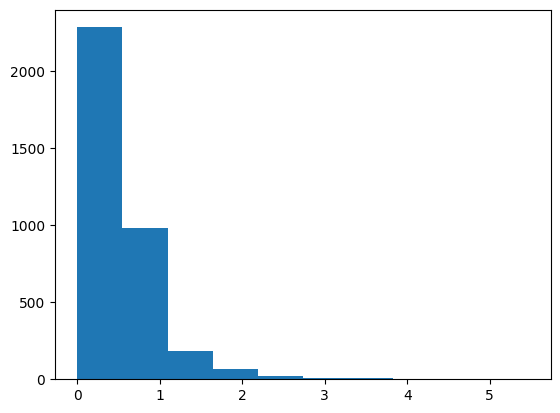

In [10]:
plt.hist(df['abs_resid'])
plt.show()

In [26]:
np.quantile(df['abs_resid'],0.95)

1.3428034099999995

In [42]:
cherry_smiles = df[df['abs_resid'] > np.quantile(df['abs_resid'],0.90)]
cherry_smiles.drop(columns = ['target', 'pred', 'residual', 'abs_resid'], inplace = True)
cherry_smiles

C:\Users\user\AppData\Local\Temp\ipykernel_33472\3935288838.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cherry_smiles.drop(columns = ['target', 'pred', 'residual', 'abs_resid'], inplace = True)


,smiles
0,N#CC(=NOCC#N)c1ccccc1
1,CCNS(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F...
2,c1ccccc1[As](c1ccccc1)c1ccccc1
3,COC(=O)c1ccccc1CS(=O)(=O)NC(=O)Nc1[n]c(cc([n]1...
4,Oc1ccc(Cl)cc1Cc1cc(Cl)ccc1O
...,...
352,CC(C)(C)N
353,Cc1[n][n](C)c(OCC(=O)c2ccccc2)c1C(=O)c1ccc(Cl)...
354,CC(C)CC=C
355,Oc1c(O)cccc1O


In [50]:
rem = set(cherry_smiles['smiles'])

In [54]:
logvp[logvp['smiles'].isin(rem)]

,smiles,logvp
9,CCN(Cc1c[n]c(Cl)cc1)/C(=C/[N+]([O-])=O)/NC,-11.090000
18,CO/N=C(/C(O)=NC)\c1ccccc1Oc1ccccc1,-6.870000
20,COC(=O)/C(=C/OC)/c1ccccc1Oc1cc([n]c[n]1)Oc1ccc...,-12.080000
24,Cc1cc(C)c(c(C)c1)S(=O)(=O)c1[n][n](c[n]1)C(=O)...,-10.650000
27,CCS(=O)(=O)c1ccc[n]c1S(=O)(=O)NC(=O)Nc1[n]c(cc...,-7.950000
...,...,...
3553,CCOC(OCC)C=C(C)CCC=C(C)C,1.487138
3561,C1=CC2=C3C(C=CC4=C3C(C=C2)=CC=C4)=C1,-5.346787
3562,O=C(OCC1=CC=CC=C1)C=CC1=CC=CC=C1,0.000000
3567,C1=CC2=C(C=C1)C1=C(C=CC3=CC=CC=C13)C=C2,-6.173925


In [61]:
# cherry_smiles에 존재하는 smiles를 제거
logvp_filtered = logvp.merge(cherry_smiles, on='smiles', how='left', indicator=True)
logvp_filtered
logvp_filtered = logvp_filtered[logvp_filtered['_merge'] == 'left_only'].drop(columns=['_merge'])

# 인덱스 재정렬
logvp_filtered = logvp_filtered.reset_index(drop=True)

# 결과 확인
print(logvp_filtered)


                                          smiles     logvp
0                       COC(F)(F)C(F)(F)C(F)(F)F  2.750000
1                              COC(F)(F)C(F)(F)F  3.210000
2            Brc1cc(Br)c(cc1)Oc1ccc(Br)c(Br)c1Br -8.140000
3                    Clc1c(Oc2ccccc2)c(Cl)ccc1Cl -3.550000
4                  Clc1cc(Oc2ccccc2)c(Cl)c(Cl)c1 -3.660000
...                                          ...       ...
3147                 CC(C)CCCC(C)CCCC(C)CCCC(C)C -2.356547
3148       O=C1C2=CC=CC3=C2C(=CC=C3)C2=C1C=CC=C2 -6.657577
3149     OC(C1=CC=CC=C1)(C1=CC=CC=C1)C1=CC=CC=C1 -7.522879
3150    C1=CC=C(C=C1)C1=C2C=CC=CC2=CC2=C1C=CC=C2 -7.045757
3151  CC(C)=CC1C(C(=O)OCC2=C(C)C=C(C)C=C2)C1(C)C -4.764472

[3152 rows x 2 columns]


In [56]:
logvp.shape

(3573, 2)

In [57]:
cherry_smiles.shape

(357, 1)

In [58]:
3573-357

3216

In [62]:
logvp_filtered.to_csv('logvp_cp.csv',index = False)

# 중복된거 제거

In [64]:
vp = pd.read_csv(r'..\datasets\VP.csv')
vp

,smiles,logvp
0,COC(F)(F)C(F)(F)C(F)(F)F,2.750000
1,COC(F)(F)C(F)(F)F,3.210000
2,Brc1cc(Br)c(cc1)Oc1ccc(Br)c(Br)c1Br,-8.140000
3,Clc1c(Oc2ccccc2)c(Cl)ccc1Cl,-3.550000
4,Clc1cc(Oc2ccccc2)c(Cl)c(Cl)c1,-3.660000
...,...,...
3568,CCC1=CC2=C(C=C1)C(=O)C1=C(C=CC=C1)C2=O,-5.991400
3569,O=C1C2=CC=CC3=C2C(=CC=C3)C2=C1C=CC=C2,-6.657577
3570,OC(C1=CC=CC=C1)(C1=CC=CC=C1)C1=CC=CC=C1,-7.522879
3571,C1=CC=C(C=C1)C1=C2C=CC=CC2=CC2=C1C=CC=C2,-7.045757


In [65]:
vp_unique = vp.drop_duplicates(subset=['smiles'], keep='first').reset_index(drop=True)

print(f"원래 행 수: {len(vp)}")
print(f"중복 제거 후 행 수: {len(vp_unique)}")

vp_unique.head()

원래 행 수: 3573
중복 제거 후 행 수: 3281


,smiles,logvp
0,COC(F)(F)C(F)(F)C(F)(F)F,2.75
1,COC(F)(F)C(F)(F)F,3.21
2,Brc1cc(Br)c(cc1)Oc1ccc(Br)c(Br)c1Br,-8.14
3,Clc1c(Oc2ccccc2)c(Cl)ccc1Cl,-3.55
4,Clc1cc(Oc2ccccc2)c(Cl)c(Cl)c1,-3.66


In [66]:
vp_unique.to_csv('vp_unique.csv', index = False)